https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

Sigmoid

In [1]:
import numpy as np

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

sigmoid(-99)

1.0112214926104486e-43

In [3]:
from sklearn.datasets import load_digits
digits = load_digits() # 8x8 = 64 pixels  -- Very clean Dataset 

#### Now that you have the dataset loaded you can use the commands below

In [4]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [6]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [13]:
digits.data.shape

(1797, 64)

In [21]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [9]:
import pandas as pd

df = pd.DataFrame(data= np.c_[digits['data'], digits['target']])
df

0    1     2     3     4     5    6    7    8    9   ...   55   56  \
0     0.0  0.0   5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1     0.0  0.0   0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.0  0.0   0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3     0.0  0.0   7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0   
4     0.0  0.0   0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...   ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
1792  0.0  0.0   4.0  10.0  13.0   6.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
1793  0.0  0.0   6.0  16.0  13.0  11.0  1.0  0.0  0.0  0.0  ...  0.0  0.0   
1794  0.0  0.0   1.0  11.0  15.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1795  0.0  0.0   2.0  10.0   7.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1796  0.0  0.0  10.0  14.0   8.0   1.0  0.0  0.0  0.0  2.0  ...  0.0  0.0   

       57   58    59    60    61   62   63   64  
0     0.0  6.0  13.0  10.0   0.0  0.0  0.0  0.0  
1     0.0  0.0  11.0  16.0  10.0  0.0  0.0  1.0  
2     0.0  0.0   3.0  11.0  16.0  9.0  0.0  2.0  
3     0.0  7.0  13.0  13.0   9.0  0.0  0.0  3.0  
4     0.0  0.0   2.0  16.0   4.0  0.0  0.0  4.0  
...   ...  ...   ...   ...   ...  ...  ...  ...  
1792  0.0  2.0  14.0  15.0   9.0  0.0  0.0  9.0  
1793  0.0  6.0  16.0  14.0   6.0  0.0  0.0  0.0  
1794  0.0  2.0   9.0  13.0   6.0  0.0  0.0  8.0  
1795  0.0  5.0  12.0  16.0  12.0  0.0  0.0  9.0  
1796  1.0  8.0  12.0  14.0  12.0  1.0  0.0  8.0  

[1797 rows x 65 columns]

In [12]:
df[(df[64] == 1) | (df[64] == 9)]

0    1     2     3     4     5    6    7    8    9   ...   55   56  \
1     0.0  0.0   0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
9     0.0  0.0  11.0  12.0   0.0   0.0  0.0  0.0  0.0  2.0  ...  0.0  0.0   
11    0.0  0.0   0.0   0.0  14.0  13.0  1.0  0.0  0.0  0.0  ...  0.0  0.0   
19    0.0  0.0   6.0  14.0   4.0   0.0  0.0  0.0  0.0  0.0  ...  2.0  0.0   
21    0.0  0.0   0.0   2.0  16.0  16.0  2.0  0.0  0.0  0.0  ...  0.0  0.0   
...   ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
1772  0.0  0.0   5.0  14.0  11.0   8.0  0.0  0.0  0.0  4.0  ...  0.0  0.0   
1774  0.0  0.0   6.0  12.0  12.0   6.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1786  0.0  0.0   4.0  14.0  15.0   6.0  0.0  0.0  0.0  5.0  ...  0.0  0.0   
1792  0.0  0.0   4.0  10.0  13.0   6.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
1795  0.0  0.0   2.0  10.0   7.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

       57   58    59    60    61    62   63   64  
1     0.0  0.0  11.0  16.0  10.0   0.0  0.0  1.0  
9     0.0  9.0  12.0  13.0   3.0   0.0  0.0  9.0  
11    0.0  0.0   1.0  13.0  16.0   1.0  0.0  1.0  
19    0.0  7.0  16.0  16.0  13.0  11.0  1.0  9.0  
21    0.0  0.0   2.0  12.0  15.0   4.0  0.0  1.0  
...   ...  ...   ...   ...   ...   ...  ...  ...  
1772  0.0  7.0  15.0  12.0   5.0   0.0  0.0  9.0  
1774  0.0  2.0  11.0  10.0   4.0   0.0  0.0  1.0  
1786  0.0  4.0  13.0  15.0   9.0   0.0  0.0  9.0  
1792  0.0  2.0  14.0  15.0   9.0   0.0  0.0  9.0  
1795  0.0  5.0  12.0  16.0  12.0   0.0  0.0  9.0  

[362 rows x 65 columns]

In [25]:
df.iloc[0,:-1].values.shape

(64,)

In [26]:
X_y = list(zip(digits.data, digits.target))
X_y_one_nine = []
for image, target in X_y:
    if target == 1 or target == 9:
        X_y_one_nine.append((image, target))


In [11]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

[[ 0.  0.  0.  1. 11.  0.  0.  0.]
 [ 0.  0.  0.  7.  8.  0.  0.  0.]
 [ 0.  0.  1. 13.  6.  2.  2.  0.]
 [ 0.  0.  7. 15.  0.  9.  8.  0.]
 [ 0.  5. 16. 10.  0. 16.  6.  0.]
 [ 0.  4. 15. 16. 13. 16.  1.  0.]
 [ 0.  0.  0.  3. 15. 10.  0.  0.]
 [ 0.  0.  0.  2. 16.  4.  0.  0.]]


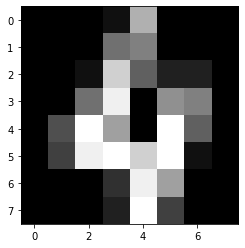

In [32]:
k = np.reshape(image, (8,8))
print(k)
plt.imshow(k, cmap=plt.cm.gray)

In [19]:
lista = [2, 6, "c", 9]
for i, x in enumerate(lista):
    print("####")
    print(i)
    print(x)

####
0
2
####
1
6
####
2
c
####
3
9


In [21]:
digits.target[0:50]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0])

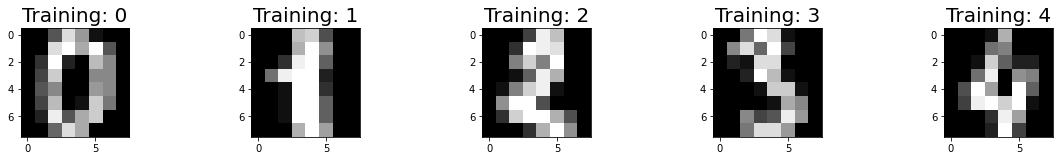

In [38]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    #plt.title('Training: %i\n' % label, fontsize = 20)
    plt.title('Training: ' + str(label), fontsize = 20)

### Splitting Data into Training and Test Sets (Digits Dataset)

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [42]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
print(y_train[:5])

[2 8 9 7 2]


### To predict

In [50]:
x_test.shape

(450, 64)

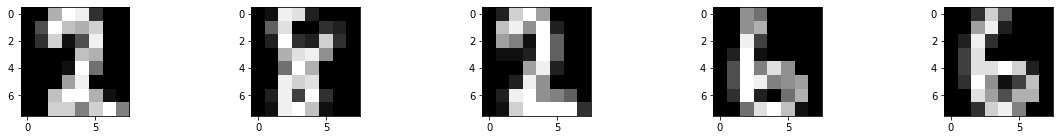

In [43]:
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(x_test[0:5], y_test[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)

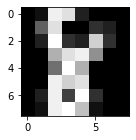

In [52]:
plt.rcParams['figure.figsize'] = , 2
first_test_image = x_test[1]
plt.imshow(np.reshape(first_test_image, (8,8)), cmap=plt.cm.gray)

In [40]:
x_test[0].shape

(64,)

In [54]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[1].reshape(1, -1))

array([8])

In [55]:
x_test.shape

(450, 64)

In [60]:
y_test[0:10]

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [43]:
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

### Probabilities

In [63]:
logisticRegr.predict(x_test[0:1])

array([2])

In [65]:
y_test[0:1]

array([2])

In [67]:
logisticRegr.predict_proba(x_test[0:1])

array([[2.04008949e-09, 8.59557507e-11, 9.99996474e-01, 1.99674698e-15,
        2.97413022e-11, 3.32611523e-09, 6.19740865e-21, 8.78183517e-09,
        3.51221552e-06, 1.11614418e-11]])

In [68]:
logisticRegr.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [61]:
max(logisticRegr.predict_proba(x_test[0:1])[0])

0.9999964735095771

### Measuring Model Performance (Digits Dataset)

In [72]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score * 100, "%")

95.33333333333334 %


### Matriz de confusión

Eje horizontal: falso positivo

Eje vertical: falso negativo

In [73]:
import sklearn.metrics as metrics
predictions = logisticRegr.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


Text(0.5, 1.0, 'Accuracy Score: 0.9533333333333334')

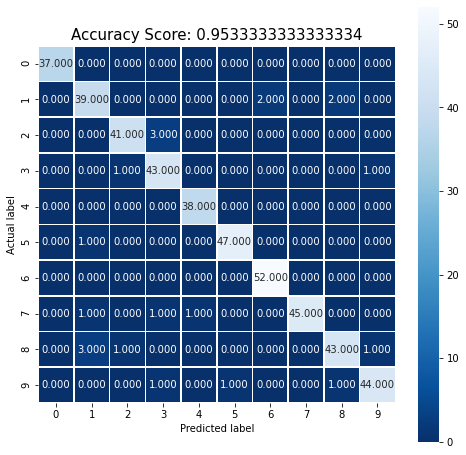

In [75]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)